# EDA (Exploratory Data Analysis)



### Import Library

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import ttest_ind, ttest_rel
from scipy import stats

Membaca dataset Spotify_review.csv

In [ ]:
data = pd.read_csv("spotify_review.csv")
data

,Time_submitted,Review,Rating,Total_thumbsup,Reply
0,2022-07-09 15:00:00,"Great music service, the audio is high quality...",5,2,NaN
1,2022-07-09 14:21:22,Please ignore previous negative rating. This a...,5,1,NaN
2,2022-07-09 13:27:32,"This pop-up ""Get the best Spotify experience o...",4,0,NaN
3,2022-07-09 13:26:45,Really buggy and terrible to use as of recently,1,1,NaN
4,2022-07-09 13:20:49,Dear Spotify why do I get songs that I didn't ...,1,1,NaN
...,...,...,...,...,...
61589,2022-01-01 03:01:29,Even though it was communicated that lyrics fe...,1,6,NaN
61590,2022-01-01 02:13:40,"Use to be sooo good back when I had it, and wh...",1,0,NaN
61591,2022-01-01 01:02:29,This app would be good if not for it taking ov...,2,10,NaN
61592,2022-01-01 00:49:23,The app is good hard to navigate and won't jus...,2,1,NaN


Deskripsi Data (Total, standar deviasi, max, min, dsb)

In [ ]:
data.describe()


,Rating,Total_thumbsup
count,61594.000000,61594.000000
mean,3.155989,7.649381
std,1.673285,89.323143
min,1.000000,0.000000
25%,1.000000,0.000000
50%,3.000000,0.000000
75%,5.000000,1.000000
max,5.000000,8195.000000


Melihat 5 data teratas

In [ ]:
data.head()

,Time_submitted,Review,Rating,Total_thumbsup,Reply
0,2022-07-09 15:00:00,"Great music service, the audio is high quality...",5,2,NaN
1,2022-07-09 14:21:22,Please ignore previous negative rating. This a...,5,1,NaN
2,2022-07-09 13:27:32,"This pop-up ""Get the best Spotify experience o...",4,0,NaN
3,2022-07-09 13:26:45,Really buggy and terrible to use as of recently,1,1,NaN
4,2022-07-09 13:20:49,Dear Spotify why do I get songs that I didn't ...,1,1,NaN


Melihat 5 Data Terbawah

In [ ]:
data.tail()

,Time_submitted,Review,Rating,Total_thumbsup,Reply
61589,2022-01-01 03:01:29,Even though it was communicated that lyrics fe...,1,6,NaN
61590,2022-01-01 02:13:40,"Use to be sooo good back when I had it, and wh...",1,0,NaN
61591,2022-01-01 01:02:29,This app would be good if not for it taking ov...,2,10,NaN
61592,2022-01-01 00:49:23,The app is good hard to navigate and won't jus...,2,1,NaN
61593,2022-01-01 00:19:09,Its good but sometimes it doesnt load the musi...,4,0,NaN


Informasi terkait data set

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61594 entries, 0 to 61593
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Time_submitted  61594 non-null  object
 1   Review          61594 non-null  object
 2   Rating          61594 non-null  int64 
 3   Total_thumbsup  61594 non-null  int64 
 4   Reply           216 non-null    object
dtypes: int64(2), object(3)
memory usage: 2.3+ MB


In [ ]:
data.shape

(61594, 5)

In [ ]:
data.columns

Index(['Time_submitted', 'Review', 'Rating', 'Total_thumbsup', 'Reply'], dtype='object')

Menghitung data null

In [ ]:
data.isna().sum()

Time_submitted        0
Review                0
Rating                0
Total_thumbsup        0
Reply             61378
dtype: int64

In [ ]:
data['Reply'].isna().sum()

61378

In [ ]:
data.duplicated().sum()

0

Menghapus data Reply

In [ ]:
data.drop(['Reply'],axis=1, inplace=True)

Pie Chart untuk Rating (Value Counts in percent)

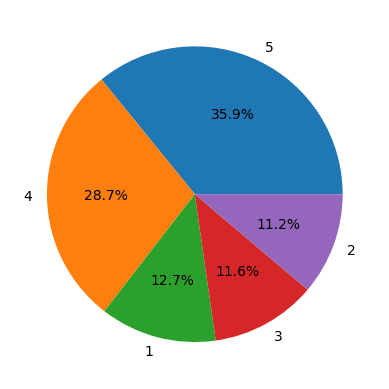

In [ ]:
plt.pie(data['Rating'].value_counts(), labels=data['Rating'].unique(), autopct='%1.1f%%')
plt.show()

Diagram perolehan data rating

<Axes: ylabel='Frequency'>

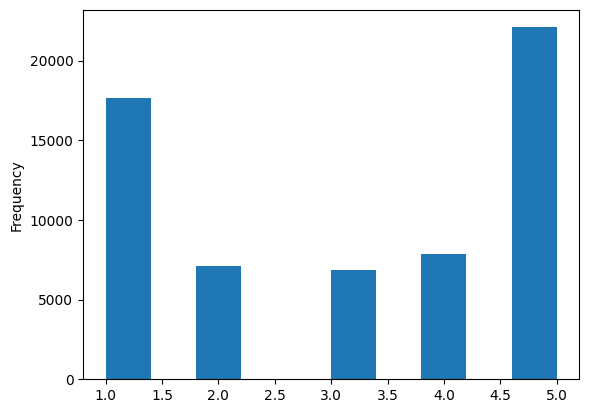

In [ ]:
data['Rating'].plot(kind='hist')

Kondisi untuk menentukan keseluruhan dari jumlah rating

In [ ]:
#dari data diatas untuk menyimpulkannya maka,

def dtRating(rating):
    if rating == 5 or rating == 4:
        return "Good"
    elif rating == 3:
        return "Neutral"
    else :
        return "Bad"


In [ ]:
data['Rating'] = data['Rating'].apply(dtRating)
data['length'] = data['Review'].str.len()

Akumulasi data rating yang menunjukan kualifikasi spotify

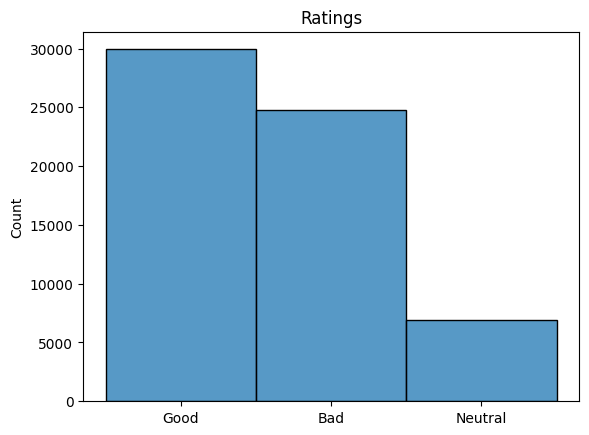

In [ ]:
sns.histplot(data['Rating'])
plt.title('Ratings')
plt.xlabel('')
plt.show()

In [ ]:
#total rating
ratings = data.groupby('Rating').count().sort_values(by='Total_thumbsup', ascending=False)
ratings

,Time_submitted,Review,Total_thumbsup,length
Rating,,,,
Good,29937,29937,29937,29937
Bad,24771,24771,24771,24771
Neutral,6886,6886,6886,6886


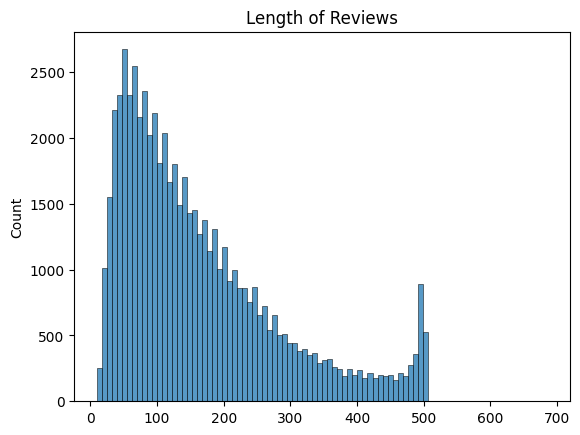

In [ ]:
sns.histplot(data['length'][data.length<700])
plt.title('Length of Reviews')
plt.xlabel('')
plt.show()


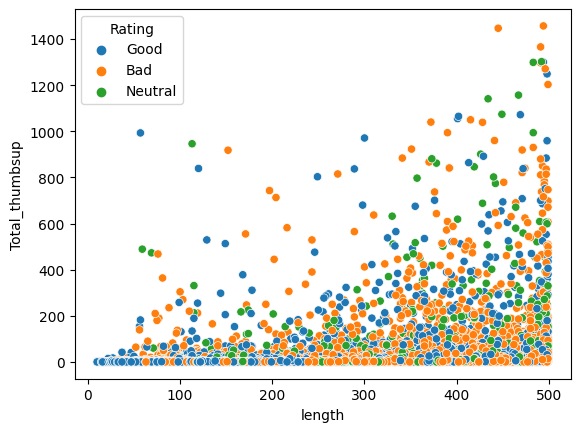

In [ ]:
sns.scatterplot(x=data['length'][data.length < 500], y=data['Total_thumbsup'][data.Total_thumbsup < 1500], hue=data['Rating'])
plt.show()

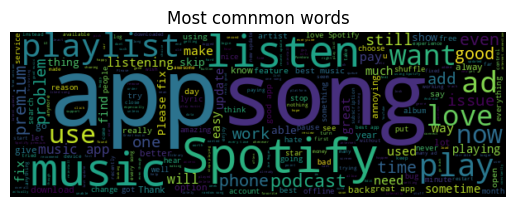

In [ ]:
from wordcloud import WordCloud

wordcloud = WordCloud(max_words=1500, width=600, background_color='black').generate(" ".join(data['Review']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Most comnmon words")
plt.axis("off")
plt.show()

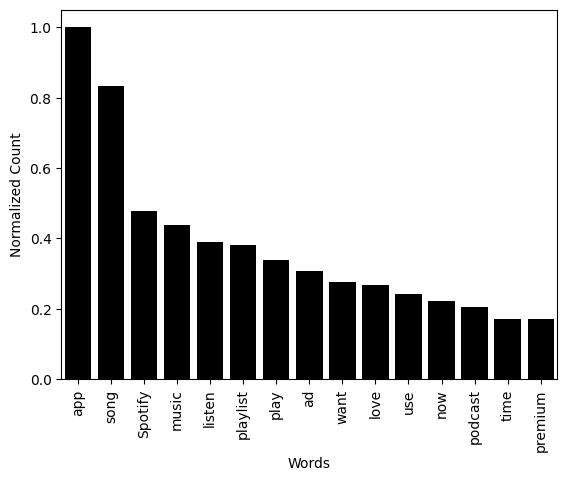

In [ ]:
x = []
y = []
for key,value in wordcloud.words_.items():
    x.append(key)
    y.append(value)
    if len(x) == 15:
        break
sns.barplot(x=x,y=y,color='black')
plt.title("")
plt.xlabel("Words")
plt.ylabel("Normalized Count")
plt.xticks(rotation=90)
plt.show()

### Preprocessing Data

In [ ]:
import re
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
data

,Time_submitted,Review,Rating,Total_thumbsup,length
0,2022-07-09 15:00:00,"Great music service, the audio is high quality...",Good,2,112
1,2022-07-09 14:21:22,Please ignore previous negative rating. This a...,Good,1,86
2,2022-07-09 13:27:32,"This pop-up ""Get the best Spotify experience o...",Good,0,106
3,2022-07-09 13:26:45,Really buggy and terrible to use as of recently,Bad,1,47
4,2022-07-09 13:20:49,Dear Spotify why do I get songs that I didn't ...,Bad,1,100
...,...,...,...,...,...
61589,2022-01-01 03:01:29,Even though it was communicated that lyrics fe...,Bad,6,279
61590,2022-01-01 02:13:40,"Use to be sooo good back when I had it, and wh...",Bad,0,263
61591,2022-01-01 01:02:29,This app would be good if not for it taking ov...,Bad,10,493
61592,2022-01-01 00:49:23,The app is good hard to navigate and won't jus...,Bad,1,272


In [ ]:
def preprocess(text):
    # menghilangkan tanda baca
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    # mengubah huruf menjadi lower case
    text = text.lower()
    # menghilangkan angka dan karakter khusus
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('[‘’“”…]', '', text)
    return text

In [ ]:
def stopword(text):
    # menghapus stopwords dari nltk
    stop_words = set(stopwords.words('english'))
    # memisahkan kata-kata dalam kalimat
    words = word_tokenize(text)
    # menghapus stopwords
    result = [word for word in words if word.casefold() not in stop_words]
    # menggabungkan kata-kata menjadi kalimat baru
    result = ' '.join(result)
    return result

In [ ]:
def lemmatizer(text):
    # mendefinisikan lemmatizer
    lemmatizer = WordNetLemmatizer()
    # memisahkan kata-kata dalam kalimat
    words = word_tokenize(text)
    # melakukan lemmatization
    result = [lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in words]
    # menggabungkan kata-kata menjadi kalimat baru
    result = ' '.join(result)
    return result

In [ ]:
def get_wordnet_pos(word):
    # mengubah POS tag dari nltk ke POS tag wordnet
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

In [ ]:
data['Review'] = data['Review'].apply(lambda x: preprocess(x))
data.head(10)

,Time_submitted,Review,Rating,Total_thumbsup,length
0,2022-07-09 15:00:00,great music service the audio is high quality...,Good,2,112
1,2022-07-09 14:21:22,please ignore previous negative rating this a...,Good,1,86
2,2022-07-09 13:27:32,this pop up get the best spotify experience o...,Good,0,106
3,2022-07-09 13:26:45,really buggy and terrible to use as of recently,Bad,1,47
4,2022-07-09 13:20:49,dear spotify why do i get songs that i didn t ...,Bad,1,100
5,2022-07-09 13:20:20,the player controls sometimes disappear for no...,Neutral,7,114
6,2022-07-09 13:19:21,i love the selection and the lyrics are provid...,Good,0,83
7,2022-07-09 13:17:22,still extremely slow when changing storage to ...,Neutral,16,352
8,2022-07-09 13:16:49,it s a great app and the best music app i hav...,Good,0,210
9,2022-07-09 13:11:32,i m deleting this app for the following reaso...,Bad,318,443


In [ ]:
data.to_csv('spotify_review1.csv')